## IMPORT LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
from IPython.display import Image
from bs4 import BeautifulSoup

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

from tensorflow import keras

from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORT DATABASE

In [ ]:
# annotations_xml=os.listdir('Datasets/Scene Classification/Annotations')
images_jpg=os.listdir('/content/Datasets/Scene Classification/Images')
len(images_jpg)

1001

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
f=os.listdir('/content/drive/MyDrive/Images')
'h'

'h'

## DATA PREPROCESSING

### Preprocessing Annotations From XML File

In [ ]:
# Reading the data inside the xml
# file to a variable under the name
# data
annotations=[]
for ann in annotations_xml:
    with open('Datasets/Scene Classification/Annotations/'+ann, 'r') as f:
        data = f.read()
        Bs_data = BeautifulSoup(data, "xml")
        parsing=Bs_data.findAll('name')
        a=[]
        for i in parsing:
            a.append(i.get_text())
        annotations.append(a)
annotations

[['boat', 'water sea', 'sky', 'person sitting', 'person sitting', 'jetski'],
 ['water sea', 'sky', '1', '2'],
 ['water sea', 'building', 'sky', 'sand beach', 'mountain', 'rainbow'],
 ['water sea', 'bridge', 'sky', 'hill', 'tree'],
 ['water sea', 'mountains', 'leaves tree', 'sky', 'leaves tree'],
 ['beach', 'sky', 'ocean', 'palm tree '],
 ['sky', 'shrub', 'beach', 'rock', 'sea'],
 ['sand beach', 'water sea', 'sky'],
 ['sky', 'sea', 'rock'],
 ['sky',
  'rock',
  'rock',
  'rock',
  'building',
  'mountain',
  'rock',
  'sea',
  'rock'],
 ['mountain', 'sea water', 'sky', 'buildings', 'sand beach'],
 ['sky',
  'sea water',
  'sand beach',
  'tree',
  'tree',
  'mountain',
  'mountain',
  'person',
  'person'],
 ['boat', 'sky', 'sand', 'water sea', 'person standing kid'],
 ['sky',
  'beach',
  'mountain',
  'mountain',
  'mountain',
  'ship',
  'sea',
  'man',
  'woman'],
 ['sea water', 'sky', 'sand beach', 'building ', 'tree', 'tree'],
 ['sky', 'sand beach', 'sea water', 'mountain', 'cloud

[<name>water sea</name>, <name>sky</name>, <name>1</name>, <name>2</name>]


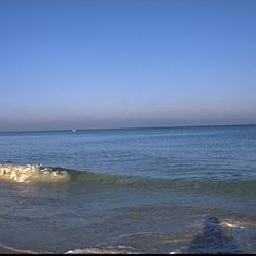

In [ ]:
with open('Datasets/Scene Classification/Annotations/coast_art1130.xml', 'r') as f:
        data = f.read()
        Bs_data = BeautifulSoup(data, "xml")
        parsing=Bs_data.findAll('name')
        a=[]
        print(parsing)
        for i in parsing:
            a.append(i.get_text())
Image(filename='Datasets/Scene Classification/Images/coast_art1130.jpg') 

### Topic Sorting

In [ ]:
topic=[]
for t in images_jpg:
    topic.append(t[:t.find('_')])
topic

['coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',
 'coast',


### Create Dataframe From The Text Data

In [ ]:
annotations_str=[]
img_and_ann=[]
img_and_annlst=[]
for i,j,k in zip(annotations,images_jpg,topic):
    annotations_str.append(' '.join(set(i)))
    img_and_ann.append([j,' '.join(set(i)),k])
    img_and_annlst.append([j,list(set(i)),k])
img_and_ann

[['coast_arnat59.jpg', 'jetski person sitting water sea boat sky', 'coast'],
 ['coast_art1130.jpg', 'water sea 2 1 sky', 'coast'],
 ['coast_art294.jpg',
  'rainbow sand beach building water sea mountain sky',
  'coast'],
 ['coast_art487.jpg', 'water sea bridge hill tree sky', 'coast'],
 ['coast_bea1.jpg', 'leaves tree water sea mountains sky', 'coast'],
 ['coast_bea10.jpg', 'beach ocean palm tree  sky', 'coast'],
 ['coast_bea14.jpg', 'beach sea rock shrub sky', 'coast'],
 ['coast_bea2.jpg', 'water sea sky sand beach', 'coast'],
 ['coast_bea20.jpg', 'rock sea sky', 'coast'],
 ['coast_bea24.jpg', 'sea building rock mountain sky', 'coast'],
 ['coast_bea26.jpg', 'sand beach buildings mountain sea water sky', 'coast'],
 ['coast_bea27.jpg', 'sand beach tree person mountain sea water sky', 'coast'],
 ['coast_bea29.jpg', 'person standing kid sand water sea boat sky', 'coast'],
 ['coast_bea3.jpg', 'beach ship sea man woman mountain sky', 'coast'],
 ['coast_bea30.jpg', 'sand beach tree building 

In [ ]:
data_df=pd.DataFrame(img_and_ann,columns=['Image','Annotations','Topic'])
data_df

,Image,Annotations,Topic
0,coast_arnat59.jpg,jetski person sitting water sea boat sky,coast
1,coast_art1130.jpg,water sea 2 1 sky,coast
2,coast_art294.jpg,rainbow sand beach building water sea mountain...,coast
3,coast_art487.jpg,water sea bridge hill tree sky,coast
4,coast_bea1.jpg,leaves tree water sea mountains sky,coast
...,...,...,...
2683,tallbuilding_urban982.jpg,trees ground buildings occluded building occlu...,tallbuilding
2684,tallbuilding_urban983.jpg,skyscraper building building occluded skyscra...,tallbuilding
2685,tallbuilding_urban987.jpg,trees building building occluded skyscraper oc...,tallbuilding
2686,tallbuilding_urban989.jpg,building occluded building tree sky,tallbuilding


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Lower ,Lemmatize annotations

In [ ]:
lemmatizer=WordNetLemmatizer()
ADJ=['sitting',]
annotations_pro=[]
for i in annotations:
    x=[]
    for j in i:
        review = re.sub('[^a-zA-Z]', ' ', j)
        review = review.lower()
        review = review.split()
        review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
        review = [lemmatizer.lemmatize(word) for word in review if not word in ADJ]
        review = ' '.join(review)
        if review!='':
            x.append(review)
    annotations_pro.append(x)
annotations_pro

[['boat', 'water sea', 'sky', 'person', 'person', 'jetski'],
 ['water sea', 'sky'],
 ['water sea', 'building', 'sky', 'sand beach', 'mountain', 'rainbow'],
 ['water sea', 'bridge', 'sky', 'hill', 'tree'],
 ['water sea', 'mountain', 'leaf tree', 'sky', 'leaf tree'],
 ['beach', 'sky', 'ocean', 'palm tree'],
 ['sky', 'shrub', 'beach', 'rock', 'sea'],
 ['sand beach', 'water sea', 'sky'],
 ['sky', 'sea', 'rock'],
 ['sky',
  'rock',
  'rock',
  'rock',
  'building',
  'mountain',
  'rock',
  'sea',
  'rock'],
 ['mountain', 'sea water', 'sky', 'building', 'sand beach'],
 ['sky',
  'sea water',
  'sand beach',
  'tree',
  'tree',
  'mountain',
  'mountain',
  'person',
  'person'],
 ['boat', 'sky', 'sand', 'water sea', 'person standing kid'],
 ['sky',
  'beach',
  'mountain',
  'mountain',
  'mountain',
  'ship',
  'sea',
  'man',
  'woman'],
 ['sea water', 'sky', 'sand beach', 'building', 'tree', 'tree'],
 ['sky', 'sand beach', 'sea water', 'mountain', 'cloud', 'cloud', 'cloud'],
 ['sky',
  '

In [ ]:
annotations_str=[]
for i in annotations_pro:
    annotations_str.append(' '.join(i))
annotations_str

['boat water sea sky person person jetski',
 'water sea sky',
 'water sea building sky sand beach mountain rainbow',
 'water sea bridge sky hill tree',
 'water sea mountain leaf tree sky leaf tree',
 'beach sky ocean palm tree',
 'sky shrub beach rock sea',
 'sand beach water sea sky',
 'sky sea rock',
 'sky rock rock rock building mountain rock sea rock',
 'mountain sea water sky building sand beach',
 'sky sea water sand beach tree tree mountain mountain person person',
 'boat sky sand water sea person standing kid',
 'sky beach mountain mountain mountain ship sea man woman',
 'sea water sky sand beach building tree tree',
 'sky sand beach sea water mountain cloud cloud cloud',
 'sky sea water sea water sand beach rock mountain mountain',
 'sky sea water sand beach rock shrub',
 'sky sand beach sea water sea water sand beach boat boat occluded house occluded tree tree sky',
 'sky sand beach palm tree palm tree building boat boat water sea',
 'sand beach sky water sea person standing 

In [ ]:
corpus=' '.join(annotations_str)

### Only select Nouns from the annotations

In [ ]:
def get_nouns(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "NN"]

In [ ]:
NOUNS=list(set(get_nouns(corpus)))

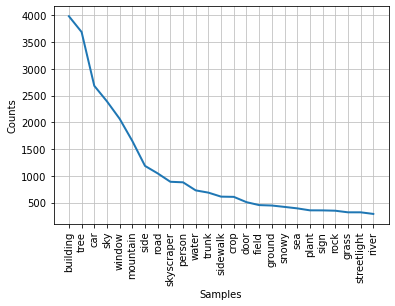

455

In [ ]:
x=[]
freq=[]
for i in annotations_str:
    for j in nltk.word_tokenize(i):
        if j in NOUNS:
            freq.append(j)
        if j not in x:
            x.append(j)
freq_dict=nltk.FreqDist(freq)
freq_dict.plot(25,cumulative=False)
len(x)

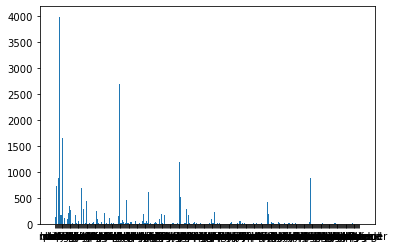

In [ ]:
plt.bar(freq_dict.keys(),freq_dict.values())
plt.savefig('Frequency_plot.png',dpi=1000)

In [ ]:
for i in freq_dict:
    print(i,freq_dict[i])

building 3984
tree 3689
car 2683
sky 2392
window 2066
mountain 1651
side 1185
road 1045
skyscraper 888
person 878
water 727
trunk 685
sidewalk 610
crop 606
door 507
field 452
ground 444
snowy 418
sea 391
plant 354
sign 353
rock 347
grass 317
streetlight 317
river 287
balcony 281
standing 261
pole 255
stone 233
pane 223
shrub 207
fence 207
van 186
rear 183
rocky 182
sand 178
poster 175
beach 167
shop 164
house 162
hill 161
brush 146
boat 124
path 118
truck 112
wall 110
bridge 109
reservation 103
column 101
palm 94
land 91
light 90
staircase 86
terrace 83
cloud 78
snow 70
bus 63
frontal 59
brand 58
name 58
sun 57
traffic 55
pot 53
handrail 49
flag 40
branch 40
crosswalk 40
wise 38
bank 37
plain 36
hedge 35
slope 34
seagull 31
flower 31
dome 31
stand 30
undergrowth 28
desert 28
motorbike 26
cow 25
tower 24
clock 24
valley 23
dock 23
chimney 22
bench 22
mast 22
woman 21
curb 21
bin 20
spotlight 20
street 19
arcade 19
fountain 18
pa 18
ship 17
cabin 17
stair 17
wheel 17
box 17
animal 17
lea

### Remove words with frequency less than 7

In [ ]:
removed_words=[]
for i in freq_dict:
    if freq_dict[i]<=7:
        removed_words.append(i)
removed_words

['lake',
 'tunnel',
 'truk',
 'verge',
 'pylon',
 'meter',
 'fire',
 'table',
 'sheep',
 'buiding',
 'crane',
 'island',
 'gate',
 'parking',
 'step',
 'cyclist',
 'satellite',
 'dish',
 'metal',
 'rainbow',
 'splash',
 'bird',
 'xxx',
 'toll',
 'groun',
 'trash',
 'telephone',
 'text',
 'peson',
 'refuge',
 'sewer',
 'stop',
 'motorcyclist',
 'glass',
 'stake',
 'cliff',
 'dog',
 'pond',
 'castle',
 'balustrade',
 'mailbox',
 'hall',
 'hydrant',
 'escape',
 'moutain',
 'monolith',
 'machine',
 'monument',
 'market',
 'horse',
 'stump',
 'cut',
 'gas',
 'station',
 'place',
 'park',
 'pedestal',
 'pulley',
 'joist',
 'moon',
 'sonwy',
 'track',
 'riverside',
 'deser',
 'tableland',
 'obelisk',
 'cafe',
 'garlan',
 'occlude',
 'bicyclist',
 'airplane',
 'statue',
 'grape',
 'sig',
 'urbanization',
 'cannon',
 'staicase',
 'ruin',
 'pillar',
 'news',
 'balcany',
 'manhole',
 'bag',
 'line',
 'junk',
 'display',
 'soil',
 'prson',
 'railway',
 'volcano',
 'eye',
 'buildin',
 'buggy',
 'sk

In [ ]:
temp=[]
for i in annotations_pro:
    temp2=[]
    for j in i:
        x=j.split()
        s=[]
        for k in x:
            if k not in removed_words:
                if k in NOUNS:
                    s.append(k)
        temp2.extend(s)
    temp.append(temp2)
temp

[['boat', 'water', 'sea', 'sky', 'person', 'person'],
 ['water', 'sea', 'sky'],
 ['water', 'sea', 'building', 'sky', 'sand', 'beach', 'mountain'],
 ['water', 'sea', 'bridge', 'sky', 'hill', 'tree'],
 ['water', 'sea', 'mountain', 'leaf', 'tree', 'sky', 'leaf', 'tree'],
 ['beach', 'sky', 'palm', 'tree'],
 ['sky', 'shrub', 'beach', 'rock', 'sea'],
 ['sand', 'beach', 'water', 'sea', 'sky'],
 ['sky', 'sea', 'rock'],
 ['sky',
  'rock',
  'rock',
  'rock',
  'building',
  'mountain',
  'rock',
  'sea',
  'rock'],
 ['mountain', 'sea', 'water', 'sky', 'building', 'sand', 'beach'],
 ['sky',
  'sea',
  'water',
  'sand',
  'beach',
  'tree',
  'tree',
  'mountain',
  'mountain',
  'person',
  'person'],
 ['boat', 'sky', 'sand', 'water', 'sea', 'person', 'standing'],
 ['sky',
  'beach',
  'mountain',
  'mountain',
  'mountain',
  'ship',
  'sea',
  'man',
  'woman'],
 ['sea', 'water', 'sky', 'sand', 'beach', 'building', 'tree', 'tree'],
 ['sky',
  'sand',
  'beach',
  'sea',
  'water',
  'mountain

In [ ]:
for i in range(len(temp)):
    annotations_pro[i]=list(set(temp[i]))
annotations_pro

[['sea', 'person', 'boat', 'water', 'sky'],
 ['water', 'sea', 'sky'],
 ['beach', 'sand', 'sea', 'building', 'water', 'mountain', 'sky'],
 ['sea', 'bridge', 'water', 'hill', 'tree', 'sky'],
 ['sea', 'leaf', 'water', 'mountain', 'tree', 'sky'],
 ['beach', 'palm', 'tree', 'sky'],
 ['beach', 'sea', 'rock', 'shrub', 'sky'],
 ['beach', 'sand', 'sea', 'water', 'sky'],
 ['rock', 'sea', 'sky'],
 ['sea', 'building', 'rock', 'mountain', 'sky'],
 ['beach', 'sea', 'sand', 'building', 'water', 'mountain', 'sky'],
 ['beach', 'sand', 'sea', 'person', 'water', 'mountain', 'tree', 'sky'],
 ['sea', 'sand', 'standing', 'boat', 'person', 'water', 'sky'],
 ['beach', 'ship', 'sea', 'man', 'woman', 'mountain', 'sky'],
 ['beach', 'sand', 'sea', 'building', 'water', 'tree', 'sky'],
 ['beach', 'sea', 'sand', 'cloud', 'water', 'mountain', 'sky'],
 ['beach', 'sand', 'sea', 'rock', 'water', 'mountain', 'sky'],
 ['beach', 'sand', 'sea', 'rock', 'shrub', 'water', 'sky'],
 ['beach', 'sea', 'sand', 'house', 'boat', 'wa

In [ ]:
annotations_str=[]
for i in annotations_pro:
    annotations_str.append(' '.join(i))

### Detect final total number of annotations

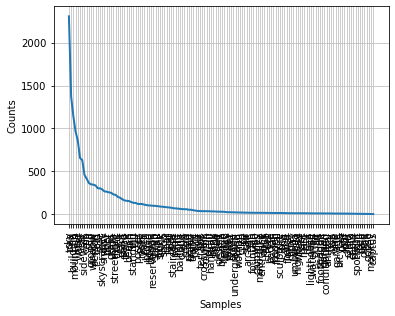

138

In [ ]:
x=[]
freq=[]
for i in annotations_pro:
    for j in i:
        freq.append(j)
        if j not in x:
            x.append(j)
freq_dict=nltk.FreqDist(freq)
freq_dict.plot(cumulative=False)
len(x)

### Visualize the frequency of annotations

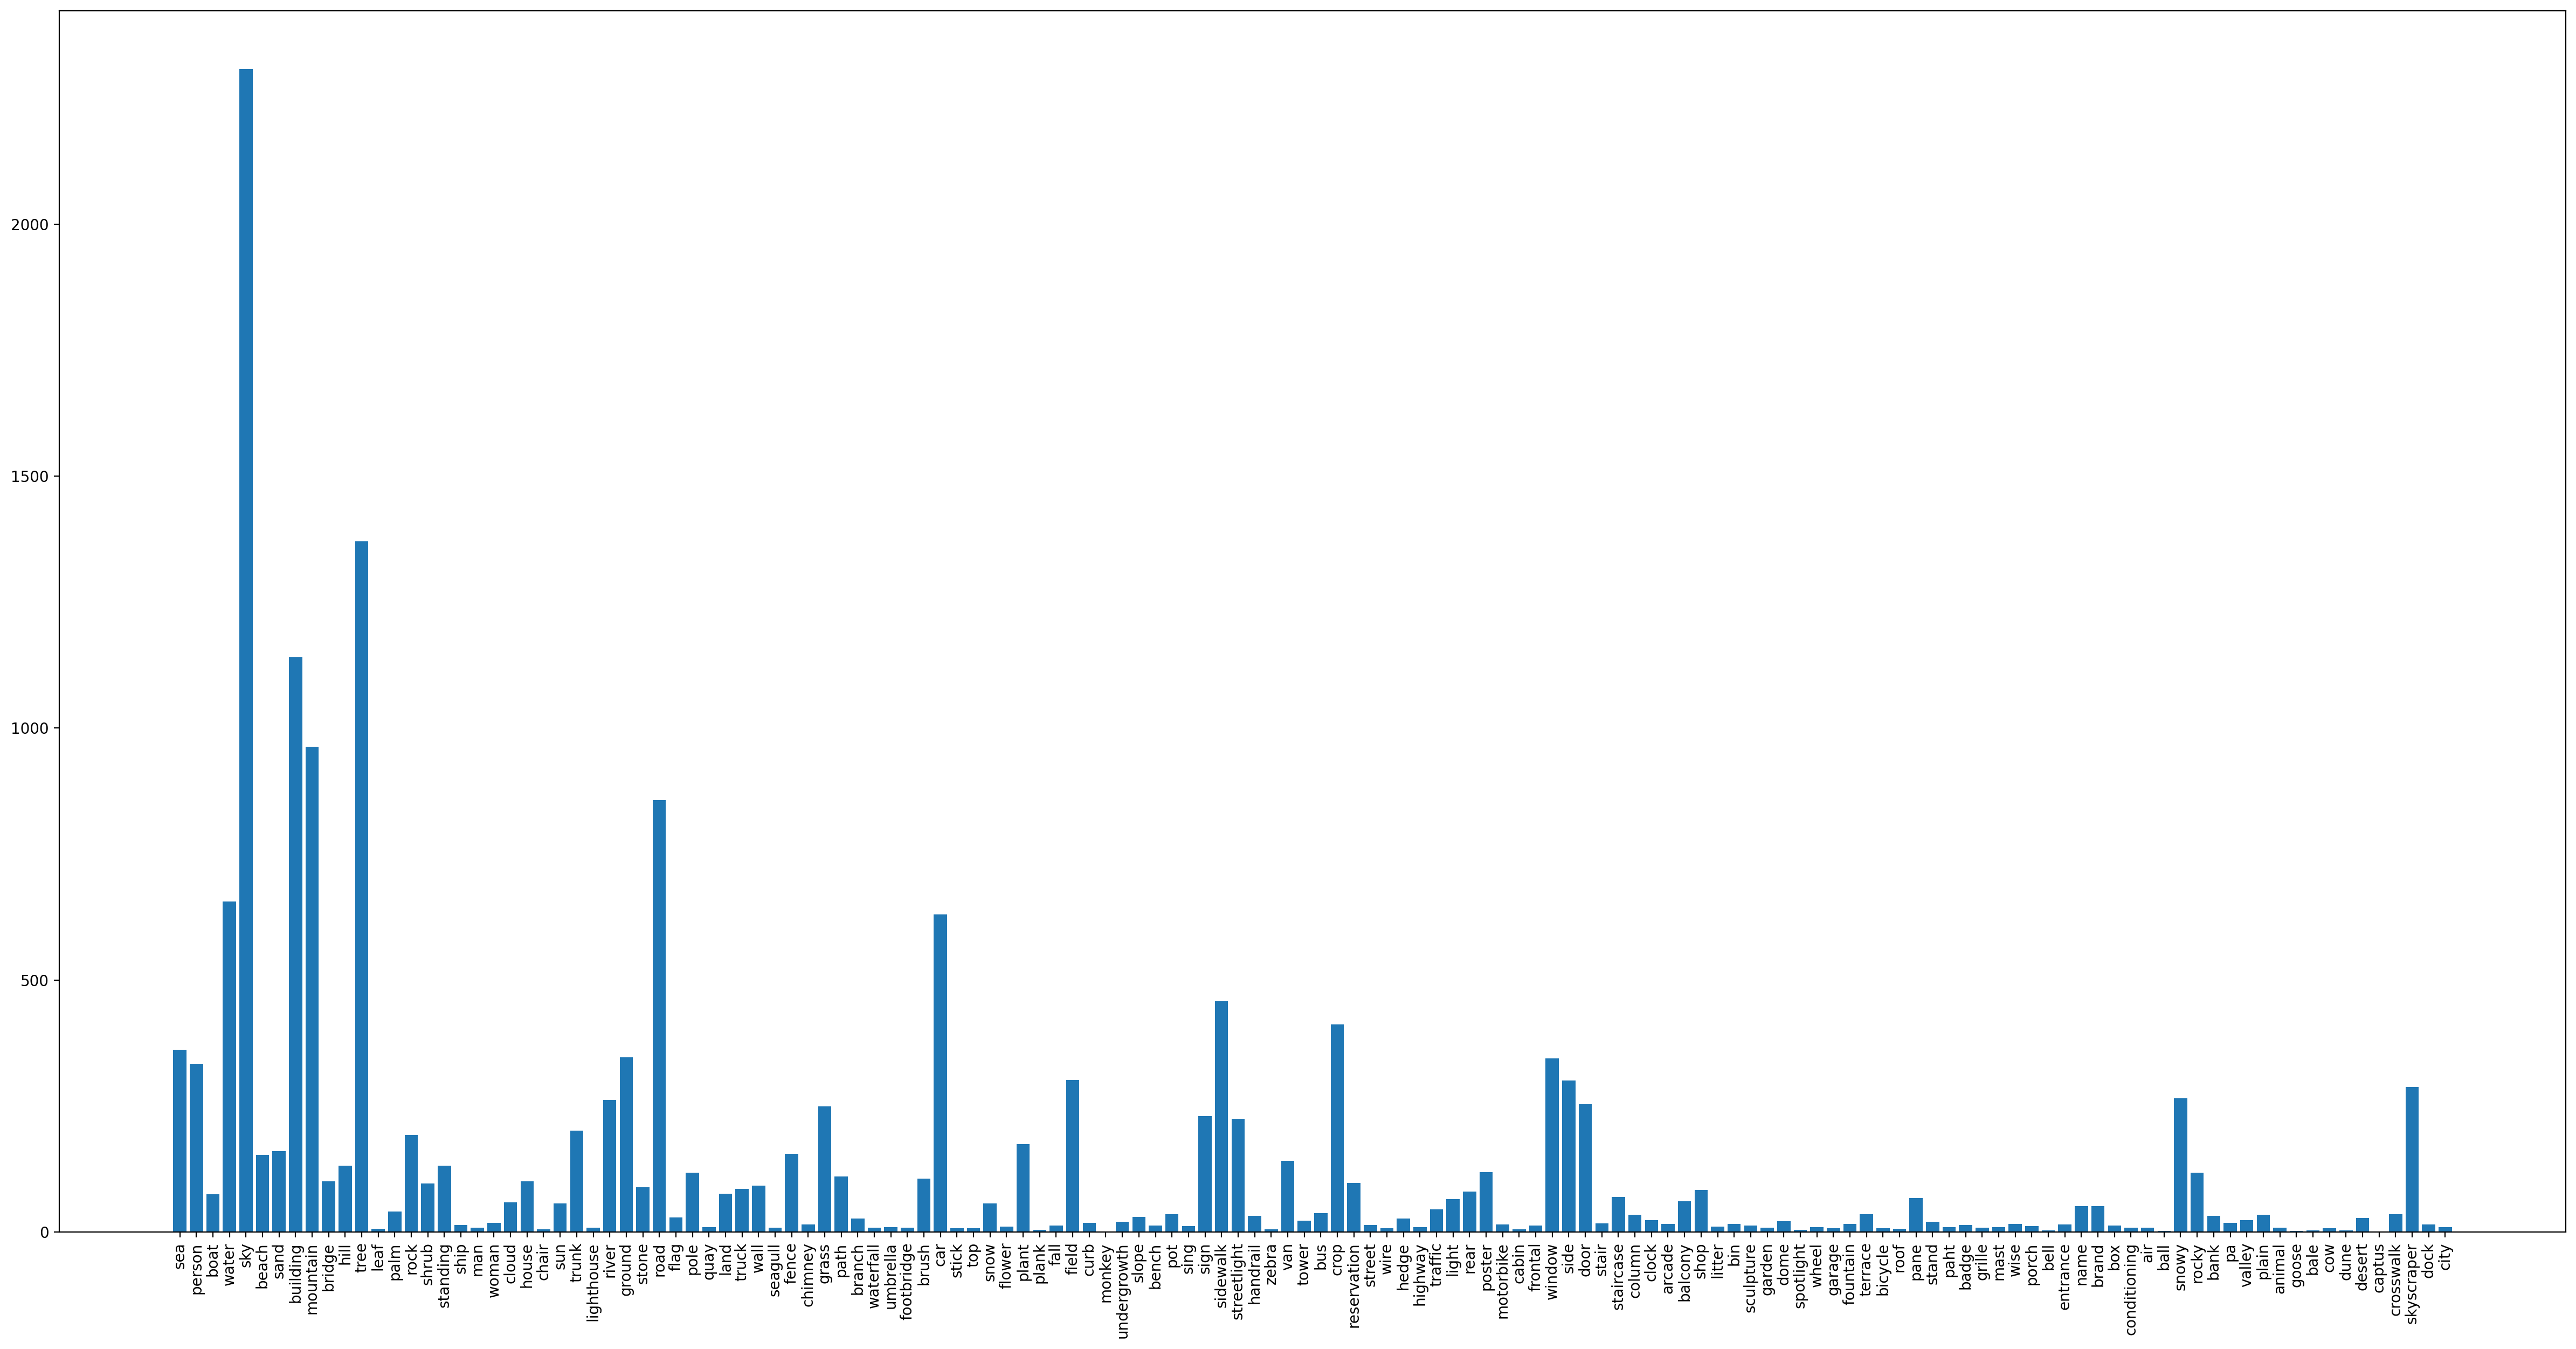

In [ ]:
plt.figure(figsize=(30,15), dpi=200)
plt.bar(freq_dict.keys(),freq_dict.values())
plt.xticks(rotation='vertical')
plt.savefig('Frequency_plot.png',dpi=1000)

## MULTICORE LATENT DIRICHILETS ALGORITHM (Multicore LDA)
![LDA](Plots/LDA.jpg)

In [ ]:
id2word=gensim.corpora.Dictionary(annotations_pro)
corpus_full=[id2word.doc2bow(text) for text in annotations_pro]
print(corpus_full[:1])
print([[(id2word[id],freq) for id,freq in cp]for cp in corpus_full[:1]])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]
[[('boat', 1), ('person', 1), ('sea', 1), ('sky', 1), ('water', 1)]]


In [ ]:
model=gensim.models.LdaMulticore(corpus=corpus_full,id2word=id2word,num_topics=len(set(topic)))
for x in model.print_topics():
    print(x)

(0, '0.131*"sky" + 0.073*"tree" + 0.055*"building" + 0.052*"water" + 0.039*"mountain" + 0.033*"trunk" + 0.033*"road" + 0.032*"sea" + 0.032*"person" + 0.031*"sidewalk"')
(1, '0.155*"sky" + 0.101*"building" + 0.079*"tree" + 0.076*"skyscraper" + 0.063*"water" + 0.053*"road" + 0.041*"river" + 0.024*"mountain" + 0.018*"car" + 0.018*"ground"')
(2, '0.117*"sky" + 0.105*"tree" + 0.055*"building" + 0.054*"road" + 0.042*"sidewalk" + 0.041*"car" + 0.037*"field" + 0.033*"crop" + 0.031*"mountain" + 0.030*"ground"')
(3, '0.159*"sky" + 0.132*"tree" + 0.094*"mountain" + 0.089*"water" + 0.044*"building" + 0.043*"river" + 0.040*"sea" + 0.027*"trunk" + 0.025*"sand" + 0.025*"skyscraper"')
(4, '0.142*"sky" + 0.109*"tree" + 0.085*"mountain" + 0.070*"road" + 0.068*"ground" + 0.041*"snowy" + 0.034*"car" + 0.031*"rock" + 0.021*"fence" + 0.020*"building"')
(5, '0.132*"sky" + 0.080*"mountain" + 0.072*"road" + 0.062*"car" + 0.060*"building" + 0.058*"tree" + 0.041*"snowy" + 0.034*"sidewalk" + 0.029*"sign" + 0.026*

## CREATE FINAL DATAFRAME

In [ ]:
annotations_str=[]
img_and_ann=[]
img_and_annlst=[]
for i,j,k in zip(annotations_pro,images_jpg,topic):
    annotations_str.append(' '.join(set(i)))
    img_and_ann.append([j,' '.join(set(i)),k])
    img_and_annlst.append([j,list(set(i)),k])
img_and_ann

[['coast_arnat59.jpg', 'sea boat person water sky', 'coast'],
 ['coast_art1130.jpg', 'water sea sky', 'coast'],
 ['coast_art294.jpg', 'beach sea sand building water mountain sky', 'coast'],
 ['coast_art487.jpg', 'sea bridge water hill tree sky', 'coast'],
 ['coast_bea1.jpg', 'sea leaf water mountain tree sky', 'coast'],
 ['coast_bea10.jpg', 'beach palm sky tree', 'coast'],
 ['coast_bea14.jpg', 'beach sea rock shrub sky', 'coast'],
 ['coast_bea2.jpg', 'beach sea sand water sky', 'coast'],
 ['coast_bea20.jpg', 'sea rock sky', 'coast'],
 ['coast_bea24.jpg', 'sea building rock mountain sky', 'coast'],
 ['coast_bea26.jpg', 'beach sand sea building water mountain sky', 'coast'],
 ['coast_bea27.jpg', 'beach sea sand person water mountain tree sky', 'coast'],
 ['coast_bea29.jpg', 'sand sea standing person boat water sky', 'coast'],
 ['coast_bea3.jpg', 'beach ship man sea woman mountain sky', 'coast'],
 ['coast_bea30.jpg', 'beach sea sand building water tree sky', 'coast'],
 ['coast_bea33.jpg',

In [ ]:
data_df=pd.DataFrame(img_and_ann,columns=['Image','Annotations','Topic'])
data_df

,Image,Annotations,Topic
0,coast_arnat59.jpg,sea boat person water sky,coast
1,coast_art1130.jpg,water sea sky,coast
2,coast_art294.jpg,beach sea sand building water mountain sky,coast
3,coast_art487.jpg,sea bridge water hill tree sky,coast
4,coast_bea1.jpg,sea leaf water mountain tree sky,coast
...,...,...,...
2683,tallbuilding_urban982.jpg,skyscraper ground building tree sky,tallbuilding
2684,tallbuilding_urban983.jpg,skyscraper building sky,tallbuilding
2685,tallbuilding_urban987.jpg,skyscraper building tree sky,tallbuilding
2686,tallbuilding_urban989.jpg,building tree sky,tallbuilding


## CONVERTING TO BAG OF WORDS MODEL

<AxesSubplot:>

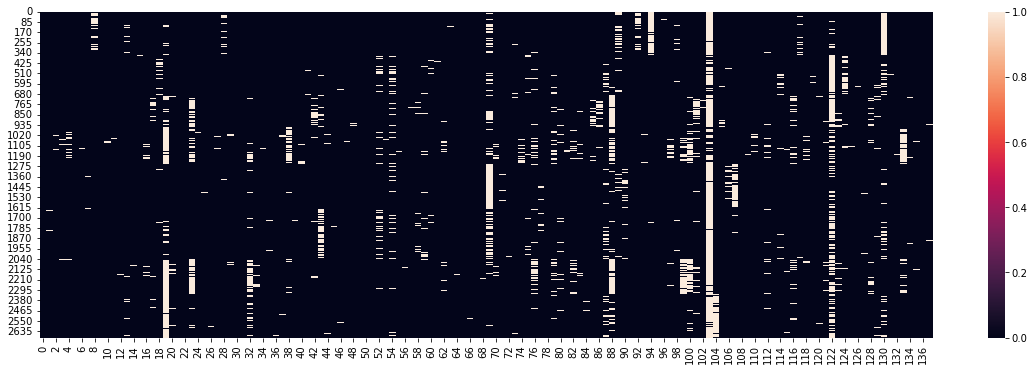

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 150)
lol = cv.fit_transform(annotations_str).toarray()
plt.figure(figsize=(20,6))
sns.heatmap(lol)

In [ ]:
df=pd.DataFrame(data=lol,columns=cv.get_feature_names())
df

,air,animal,arcade,badge,balcony,bale,ball,bank,beach,bell,...,van,wall,water,waterfall,wheel,window,wire,wise,woman,zebra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_df=pd.concat([data_df['Image'],df,data_df['Topic']],axis=1)
data_df

,Image,air,animal,arcade,badge,balcony,bale,ball,bank,beach,...,wall,water,waterfall,wheel,window,wire,wise,woman,zebra,Topic
0,coast_arnat59.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,coast
1,coast_art1130.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,coast
2,coast_art294.jpg,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,coast
3,coast_art487.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,coast
4,coast_bea1.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,coast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,tallbuilding_urban982.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tallbuilding
2684,tallbuilding_urban983.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tallbuilding
2685,tallbuilding_urban987.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tallbuilding
2686,tallbuilding_urban989.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tallbuilding


## SPLIT DATA INTO TRAIN AND TEST SET

In [ ]:
X=data_df.iloc[:,:-1]
y=data_df.iloc[:,-1]

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [5]:
X_train=pd.read_csv('/content/Datasets/Scene Classification/csv_files/X_Train.csv')
X_test=pd.read_csv('/content/Datasets/Scene Classification/csv_files/X_test.csv')
X_val=pd.read_csv('/content/Datasets/Scene Classification/csv_files//X_val.csv')
y_train=pd.read_csv('/content/Datasets/Scene Classification/csv_files/y_train.csv')
y_test=pd.read_csv('/content/Datasets/Scene Classification/csv_files/y_test.csv')
y_val=pd.read_csv('/content/Datasets/Scene Classification/csv_files/y_val.csv')

In [6]:
X_test

,Unnamed: 0,Image,building,car,crop,door,field,ground,mountain,road,rocky,sand,sea,sidewalk,sign,sky,skyscraper,snowy,tree,trunk,water,window
0,1339,mountain_n18019.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,2216,street_par153.jpg,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
2,368,forest_cdmc12.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,535,forest_nat209.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2583,tallbuilding_city8.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,964,insidecity_a385073.jpg,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
534,1293,mountain_land26.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0
535,1461,mountain_nat1062.jpg,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
536,353,coast_sun45.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


### Save .csv Files

In [ ]:
X_train.to_csv('/Users/Aditya/DL/Datasets/csv_files/X_Train.csv')
X_test.to_csv('/Users/Aditya/DL/Datasets/csv_files/X_test.csv')
X_val.to_csv('/Users/Aditya/DL/Datasets/csv_files/X_val.csv')
y_train.to_csv('/Users/Aditya/DL/Datasets/csv_files/y_train.csv')
y_test.to_csv('/Users/Aditya/DL/Datasets/csv_files/y_test.csv')
y_val.to_csv('/Users/Aditya/DL/Datasets/csv_files/y_val.csv')

## EDA

opencountry     253
coast           228
mountain        225
tallbuilding    212
forest          199
insidecity      174
street          168
highway         153
Name: Topic, dtype: int64

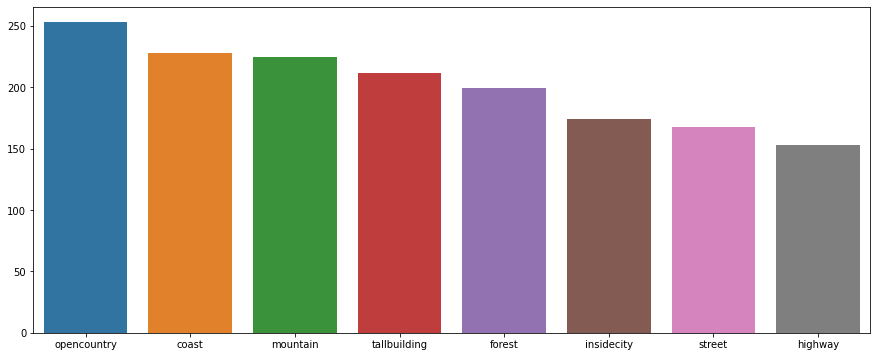

In [ ]:
plt.figure(figsize=(15,6))
d=y_train.value_counts()
sns.barplot(x=d.index,y=d.values)
d

<AxesSubplot:>

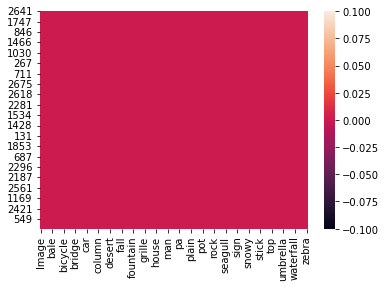

In [ ]:
sns.heatmap(X_train.isnull())

In [ ]:
X_sub_Train=X_train['Image']

## DEFINING CNN MODEL

In [7]:
optimal_num_topics = 20

In [8]:
# Create model
vgg16_model = keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))

# pop the last softmax layer 
vgg16_model.layers.pop()

# freezing the remaining layers
for layer in vgg16_model.layers:
    layer.trainable = False

output_model = keras.layers.Dense(2056, activation='tanh')(vgg16_model.layers[-1].output)
output_model = keras.layers.Dropout(0.5)(output_model)
output_model = keras.layers.Dense(1024, activation='tanh')(output_model)
output_model = keras.layers.Dropout(0.5)(output_model)
output_model = keras.layers.Dense(optimal_num_topics, activation='sigmoid')(output_model)

inputs=vgg16_model.input
outputs = output_model
vgg16_model = keras.models.Model(inputs=inputs,outputs=outputs)            

vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
vgg16_model.summary()

553476096/553467096 [==============================] - 8s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [9]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, images_paths, labels, image_dimensions=(224, 224, 3), batch_size=64, shuffle=False):
        self.labels       = labels              # array of labels
        self.images_paths = images_paths        # array of image paths
        self.image_dim = image_dimensions
        self.batch_size   = batch_size          # batch size
        self.shuffle      = shuffle             # shuffle bool

        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.images_paths) / self.batch_size))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.images_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        'Generate one batch of data'
        # selects indices of data for next batch
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

        # select data and load images
        labels = np.array([self.labels[k] for k in indexes])

        images = np.array([self.preprocessImageForVGG16('/content/drive/MyDrive/Images/'+self.images_paths[k]) for k in indexes])
        
        return images, labels
    
    
    #customize function used for color convetion
    def preprocessImageForVGG16(self, filename):
        # load image
        image = keras.preprocessing.image.load_img(filename, target_size=(self.image_dim[0], self.image_dim[1]))
        # convert the image pixels to a numpy array
        image = keras.preprocessing.image.img_to_array(image)
        # prepare the image for the VGG model
        #RGB to BGR and zero centering
        image = keras.applications.vgg16.preprocess_input(image) 

        return image

In [12]:
X_test.iloc[:,2:].values

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.24399, saving model to /content/training/topic_predictor_model2.hdf5
32/32 - 228s - loss: 0.2500 - accuracy: 0.3231 - val_loss: 0.2440 - val_accuracy: 0.3500 - lr: 0.0010 - 228s/epoch - 7s/step
Epoch 2/20

Epoch 00002: val_loss improved from 0.24399 to 0.23856, saving model to /content/training/topic_predictor_model2.hdf5
32/32 - 20s - loss: 0.2354 - accuracy: 0.2956 - val_loss: 0.2386 - val_accuracy: 0.3800 - lr: 0.0010 - 20s/epoch - 611ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 0.23856 to 0.23656, saving model to /content/training/topic_predictor_model2.hdf5
32/32 - 20s - loss: 0.2283 - accuracy: 0.2763 - val_loss: 0.2366 - val_accuracy: 0.4060 - lr: 0.0010 - 20s/epoch - 614ms/step
Epoch 4/20

Epoch 00004: val_loss did not improve from 0.23656
32/32 - 18s - loss: 0.2203 - accuracy: 0.3038 - val_loss: 0.2371 - val_accuracy: 0.3960 - lr: 0.0010 - 18s/epoch - 558ms/step
Epoch 5/20

Epoch 00005: ReduceLROnPlateau reduc

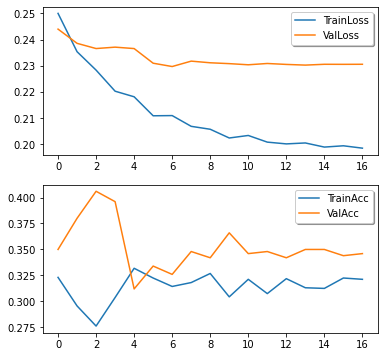

In [14]:
# Train the model
# reduces learning rate if no improvement are seen
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0000001)

# stop training if no improvements are seen
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",
                           mode="min",
                           patience=10)

# saves model weights to file
checkpoint_path = "/content/training/topic_predictor_model2.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min',
                             save_weights_only=True)


X_t = X_train['Image'].values
Y_t = X_train.iloc[:,2:].values

X_v = X_val['Image'].values
Y_v = X_val.iloc[:,2:].values

# prepare data generator
train_data = DataGenerator(X_t, Y_t, batch_size=50, shuffle=True)
valid_data = DataGenerator(X_v, Y_v, batch_size=50, shuffle=False)

# train on data
history = vgg16_model.fit_generator(generator=train_data,
                                   validation_data=valid_data,
                                   epochs=20,
                                   steps_per_epoch=len(train_data),
                                   validation_steps =len(valid_data),
                                   callbacks=[learning_rate_reduction, early_stop, checkpoint],
                                   verbose=2,
                                   )

# plot training history
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(history.history['loss'], label="TrainLoss")
ax[0].plot(history.history['val_loss'], label="ValLoss")
ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label="TrainAcc")
ax[1].plot(history.history['val_accuracy'], label="ValAcc")
ax[1].legend(loc='best', shadow=True)
plt.show()

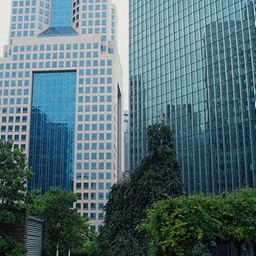

In [3]:
display(Image(filename='C:/Users/Aditya/DL/Datasets/Scene Classification/Images/tallbuilding_a805044.jpg'))

In [ ]:
# plot training history
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(history.history['loss'], label="TrainLoss")
ax[0].plot(history.history['val_loss'], label="ValLoss")
ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label="TrainAcc")
ax[1].plot(history.history['val_accuracy'], label="ValAcc")
ax[1].legend(loc='best', shadow=True)
plt.savefig('Plots/TrainValLossAcc.jpg')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label="TrainLoss")
plt.plot(history.history['val_loss'], label="ValLoss")
plt.legend(loc='best', shadow=True)
plt.savefig('Plots/TrainValLoss.jpg')
plt.show()

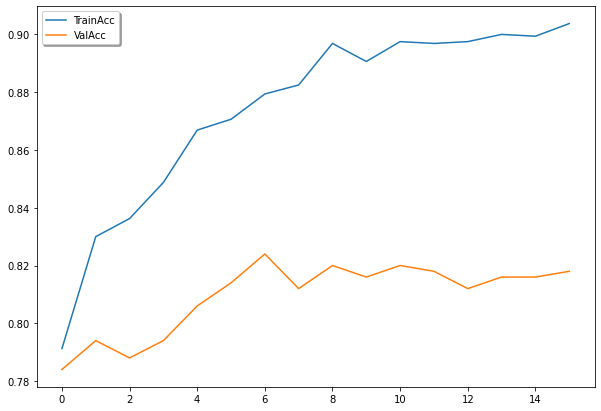

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label="TrainAcc")
plt.plot(history.history['val_accuracy'], label="ValAcc")
plt.legend(loc='best', shadow=True)
plt.savefig('Plots/TrainValAcc.jpg')
plt.show()

## PREDICT ANNOTATIONS FROM TEST SET

In [15]:
vgg16_model.load_weights('/content/training/topic_predictor_model2.hdf5')
X_tt = X_test['Image'].values
Y_tt = X_test.iloc[:,2:].values

# prepare data generator
test_data = DataGenerator(X_tt, Y_tt, batch_size=1, shuffle=False)

# predict on data
pred_caption_topics_prob = vgg16_model.predict_generator(test_data)
pred_caption_topics = np.argmax(pred_caption_topics_prob, axis=1)

pred_caption_topics
# results_df = pd.DataFrame({ 'image_id':X_test['Image'], 'pred_topics':pred_caption_topics })
# results_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


array([ 6,  0, 16, 16, 13,  6,  6,  6,  4, 16,  7,  0, 13, 13, 13,  7, 16,
       13, 16, 13, 13, 13, 13,  0, 13,  0, 13,  6, 13, 13, 13,  0, 16, 13,
       16, 16, 13, 13, 13, 13,  1, 16,  0, 13, 13,  0,  7, 13, 16,  6, 16,
       13, 13, 13, 13, 13,  6, 13,  0, 13,  0, 13,  6,  7, 13,  0,  6, 13,
       13,  0, 16, 16, 13, 13, 16, 13, 13,  0, 13, 16, 16, 13,  7, 13,  0,
       13,  0,  7, 13, 13, 13, 13, 13, 13,  3, 13, 13, 13, 13, 18, 16, 13,
       13,  6,  6,  0, 13, 16,  0,  7, 16, 16, 13,  1, 13,  8, 16,  6,  6,
       13,  6,  0, 13, 13,  6,  1, 13, 13,  7,  6, 13,  7,  0, 13, 13,  0,
       13, 13, 13, 18,  0, 13, 16, 13, 16,  0, 13, 16, 13, 13, 16,  6, 13,
        0,  7, 13,  0, 13,  0, 13, 13, 16, 13, 13,  0, 13,  0,  7,  7, 13,
       13, 13,  7, 13,  0, 16, 13,  7, 13,  6,  0, 16,  6,  6, 13, 13, 16,
       10, 19, 16, 13, 14,  0,  7, 13, 13, 16, 16,  6,  6, 16,  0,  0,  0,
       13, 13, 16, 13, 13, 13, 13, 13, 13, 13,  0, 13, 16, 16,  6, 13, 13,
       13, 16, 13, 13, 13

In [16]:
from keras.applications.vgg16 import decode_predictions
gg=pd.DataFrame(pred_caption_topics_prob,columns=X_test.columns[2:])
lol=pd.concat([X_test.iloc[:,:2],gg],axis=1)
lol.iloc[0,:],X_test.iloc[0,2:]

(Unnamed: 0                   1339
 Image         mountain_n18019.jpg
 building                0.0420789
 car                     0.0172018
 crop                    0.0343035
 door                   0.00686353
 field                   0.0357182
 ground                  0.0692305
 mountain                 0.989541
 road                     0.082826
 rocky                    0.103963
 sand                   0.00333205
 sea                    0.00635479
 sidewalk               0.00661953
 sign                    0.0127341
 sky                      0.981562
 skyscraper            0.000987098
 snowy                    0.779659
 tree                     0.350888
 trunk                  0.00665066
 water                   0.0669564
 window                 0.00752818
 Name: 0, dtype: object, building      0
 car           0
 crop          0
 door          0
 field         0
 ground        0
 mountain      1
 road          0
 rocky         0
 sand          0
 sea           0
 sidewalk      0
 s

In [17]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [18]:
lol.iloc[1,1]

'street_par153.jpg'

In [19]:
# for i in range(len(lol.iloc[0,2:])):
#     print(lol.iloc[0,i])
lol.iloc[1,2:].sort_values(ascending=False).head(3)

building    0.996874
road        0.985974
sky         0.980913
Name: 1, dtype: object

In [20]:
X_test.loc[1,X_test.iloc[1,:]==1]

building    1
car         1
crop        1
road        1
sidewalk    1
sign        1
sky         1
Name: 1, dtype: object

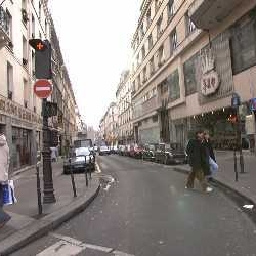

In [21]:
display(Image(filename='/content/drive/MyDrive/Images/street_par153.jpg'))

 NEW PROBLEM: FROM ANNOTATIIONS PREDICT CLASS

## CREATE NEW ANNOTATIONS DATAFRAME

In [53]:
X_test

,Unnamed: 0,Image,building,car,crop,door,field,ground,mountain,road,rocky,sand,sea,sidewalk,sign,sky,skyscraper,snowy,tree,trunk,water,window
0,1339,mountain_n18019.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,2216,street_par153.jpg,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
2,368,forest_cdmc12.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,535,forest_nat209.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2583,tallbuilding_city8.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,964,insidecity_a385073.jpg,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
534,1293,mountain_land26.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0
535,1461,mountain_nat1062.jpg,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
536,353,coast_sun45.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [56]:
ann_X_train=X_train.iloc[:,2:]
ann_X_val=X_val.iloc[:,2:]
ann_X_test=X_test.iloc[:,2:]
ann_X_pred=pd.DataFrame(pred_caption_topics_prob,columns=X_test.columns[2:])
ann_X_pred

,building,car,crop,door,field,ground,mountain,road,rocky,sand,sea,sidewalk,sign,sky,skyscraper,snowy,tree,trunk,water,window
0,0.042079,0.017202,0.034304,0.006864,0.035718,0.069230,0.989541,0.082826,0.103963,0.003332,0.006355,0.006620,0.012734,0.981562,0.000987,0.779659,0.350888,0.006651,0.066956,0.007528
1,0.996874,0.960098,0.611829,0.062857,0.000842,0.004630,0.115366,0.985974,0.000198,0.000780,0.001170,0.959652,0.098127,0.980913,0.002072,0.000360,0.154541,0.000291,0.001236,0.272077
2,0.022610,0.001408,0.016546,0.013938,0.005774,0.649540,0.018934,0.001886,0.005041,0.002622,0.002824,0.002324,0.001002,0.336080,0.020180,0.007167,0.970699,0.860626,0.157083,0.011514
3,0.036532,0.002540,0.011245,0.001576,0.306545,0.053319,0.071195,0.010589,0.002722,0.002304,0.005077,0.001371,0.002276,0.852363,0.002083,0.003466,0.865816,0.078763,0.063910,0.000922
4,0.953426,0.132994,0.191176,0.018446,0.003212,0.085376,0.046489,0.189839,0.000820,0.002529,0.004495,0.112428,0.031765,0.969498,0.479878,0.001481,0.614583,0.007312,0.056914,0.073085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.039220,0.116173,0.020810,0.899568,0.624780,0.857463,0.084635,0.544958,0.053027,0.010664,0.002705,0.210006,0.151928,0.014896,0.000489,0.067717,0.977721,0.969451,0.005795,0.637420
534,0.050495,0.020075,0.023345,0.004405,0.048496,0.057106,0.983416,0.101521,0.070672,0.008176,0.028779,0.006569,0.015978,0.991914,0.000867,0.531393,0.248907,0.002924,0.111258,0.004044
535,0.044490,0.015895,0.034091,0.007125,0.035414,0.069477,0.985039,0.075878,0.117244,0.003421,0.005997,0.006406,0.011123,0.975223,0.001041,0.653926,0.377923,0.008136,0.083005,0.007099
536,0.074824,0.004365,0.001227,0.000229,0.005916,0.013896,0.239581,0.005189,0.001321,0.794829,0.993161,0.002229,0.004267,0.999502,0.001159,0.001316,0.114309,0.000642,0.991115,0.000078


## PREDICT CLASS FROM THE ANNOTATIONS

In [38]:
X_train.iloc[:,2:]

,building,car,crop,door,field,ground,mountain,road,rocky,sand,sea,sidewalk,sign,sky,skyscraper,snowy,tree,trunk,water,window
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1608,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1609,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1610,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


### SGDClassifier

In [162]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss,accuracy_score
from sklearn.model_selection import GridSearchCV
classifier = SGDClassifier(random_state=123)
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
predictions=classifier.predict(ann_X_pred)

In [167]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['hinge', 'log', 'squared_hinge'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=classifier, param_grid=grid, cv=5)
search.fit(X_train.iloc[:,2:], y_train['Topic'])
search.best_params_

{'early_stopping': False,
 'fit_intercept': True,
 'loss': 'hinge',
 'penalty': 'l2'}

In [168]:
grid_scores = cross_val_score(search.best_estimator_,X_train.iloc[:,2:], y_train['Topic'], cv=5)
print(grid_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_scores.mean(), grid_scores.std() * 2))

[0.83591331 0.90092879 0.90062112 0.88198758 0.90062112]
Accuracy: 0.88 (+/- 0.05)


In [231]:
classifier=SGDClassifier(early_stopping= False,
 fit_intercept= True,
 loss= 'hinge',
 penalty='l2',random_state=123)
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])
predictions=classifier.predict(ann_X_pred)

Log-loss score : 9.013398366457468
Accuracy score : 0.8011152416356877
Confusion matrix :
[[66  2  0  0  0  1  0  1]
 [ 0 56  1  0  1 15  0  0]
 [ 1  0 44  1  0  2  1  2]
 [ 1  2  1 50  0  0  5  5]
 [ 0  0  0  0 52 18  0  0]
 [ 6  1  2  0  4 60  0  1]
 [ 0  0  3 15  0  1 37  4]
 [ 2  2  2  2  0  0  2 66]]


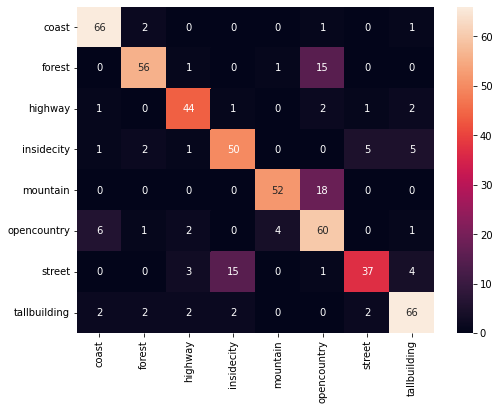

In [232]:
# Evaluation score
import sklearn
from sklearn.preprocessing import LabelEncoder
topics=['coast','forest','highway','insidecity','mountain','opencountry','street','tallbuilding']
le=LabelEncoder()
le.fit(topics)
predictions=le.transform(predictions)
temp=le.transform(y_test['Topic'])
log_score = sklearn.metrics.log_loss(ann_X_test.values,ann_X_pred.values)
print('Log-loss score :', log_score)

acc_score = sklearn.metrics.accuracy_score(temp, predictions)
print('Accuracy score :', acc_score)

print('Confusion matrix :')
conf_matrix=sklearn.metrics.confusion_matrix(temp, predictions)
print(conf_matrix)
df_cm = pd.DataFrame(data=conf_matrix, index = le.inverse_transform([x for x in range(8)]),columns = le.inverse_transform([x for x in range(8)]))
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)

### KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss,accuracy_score
classifier=KNeighborsClassifier(n_neighbors=10)
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [149]:
predictions=classifier.predict(ann_X_pred)

Log-loss score : 9.013398366457468
Accuracy score : 0.7509293680297398
Confusion matrix :
[[65  2  0  0  0  2  0  1]
 [ 0 53  1  0  2 17  0  0]
 [ 1  0 43  0  0  3  2  2]
 [ 1  4  5 32  0  0 11 11]
 [ 1  1  0  0 63  5  0  0]
 [ 5 19  0  0 12 37  0  1]
 [ 0  0  7  6  0  1 45  1]
 [ 2  2  3  1  0  0  2 66]]


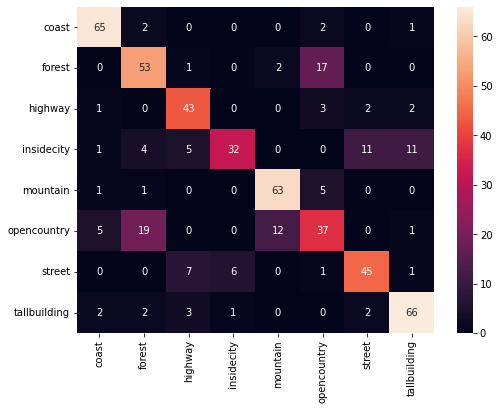

In [150]:
# Evaluation score
import sklearn
from sklearn.preprocessing import LabelEncoder
topics=['coast','forest','highway','insidecity','mountain','opencountry','street','tallbuilding']
le=LabelEncoder()
le.fit(topics)
predictions=le.transform(predictions)
temp=le.transform(y_test['Topic'])
log_score = sklearn.metrics.log_loss(ann_X_test.values,ann_X_pred.values)
print('Log-loss score :', log_score)

acc_score = sklearn.metrics.accuracy_score(temp, predictions)
print('Accuracy score :', acc_score)

print('Confusion matrix :')
conf_matrix=sklearn.metrics.confusion_matrix(temp, predictions)
print(conf_matrix)
df_cm = pd.DataFrame(data=conf_matrix, index = le.inverse_transform([x for x in range(8)]),columns = le.inverse_transform([x for x in range(8)]))
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)

### Decision Tree

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss,accuracy_score
classifier=DecisionTreeClassifier(max_depth=200)
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=200, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [223]:
predictions=classifier.predict(ann_X_pred)

Log-loss score : 9.013398366457468
Accuracy score : 0.7490706319702602
Confusion matrix :
[[65  2  1  0  0  2  0  0]
 [ 1 51  1  0  2 18  0  0]
 [ 1  0 45  0  0  3  0  2]
 [ 0  3  7 33  0  0  8 13]
 [ 1  1  0  0 63  5  0  0]
 [ 5 18  1  0 12 37  0  1]
 [ 0  0  9  5  0  1 45  0]
 [ 1  1  7  0  0  0  3 64]]


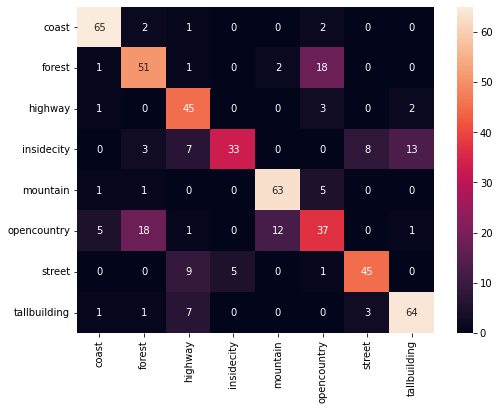

In [224]:
# Evaluation score
import sklearn
from sklearn.preprocessing import LabelEncoder
topics=['coast','forest','highway','insidecity','mountain','opencountry','street','tallbuilding']
le=LabelEncoder()
le.fit(topics)
predictions=le.transform(predictions)
temp=le.transform(y_test['Topic'])
log_score = sklearn.metrics.log_loss(ann_X_test.values,ann_X_pred.values)
print('Log-loss score :', log_score)

acc_score = sklearn.metrics.accuracy_score(temp, predictions)
print('Accuracy score :', acc_score)

print('Confusion matrix :')
conf_matrix=sklearn.metrics.confusion_matrix(temp, predictions)
print(conf_matrix)
df_cm = pd.DataFrame(data=conf_matrix, index = le.inverse_transform([x for x in range(8)]),columns = le.inverse_transform([x for x in range(8)]))
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)

### SVM

In [187]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss,accuracy_score
classifier=SVC()
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [188]:
predictions=classifier.predict(ann_X_pred)

In [189]:
grid = {'kernel': ['poly', 'rbf','linear'],
        'degree': [x for x in range(10)],
        'gamma': ['scale', 'auto']
        }
search = GridSearchCV(estimator=classifier, param_grid=grid, cv=5)
search.fit(X_train.iloc[:,2:], y_train['Topic'])
search.best_params_

{'degree': 0, 'gamma': 'scale', 'kernel': 'rbf'}

In [190]:
grid_scores = cross_val_score(search.best_estimator_,X_train.iloc[:,2:], y_train['Topic'], cv=5)
print(grid_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_scores.mean(), grid_scores.std() * 2))

[0.84829721 0.89473684 0.91304348 0.85093168 0.87888199]
Accuracy: 0.88 (+/- 0.05)


In [191]:
classifier=SVC(gamma='scale', kernel= 'rbf')

Log-loss score : 9.013398366457468
Accuracy score : 0.7955390334572491
Confusion matrix :
[[65  2  0  0  0  2  0  1]
 [ 0 58  1  0  4 10  0  0]
 [ 1  0 43  0  0  3  2  2]
 [ 1  2  1 39  0  0 13  8]
 [ 1  1  0  0 64  4  0  0]
 [ 6  9  1  0 13 44  0  1]
 [ 0  0  5  5  1  0 49  0]
 [ 2  1  3  1  0  0  3 66]]


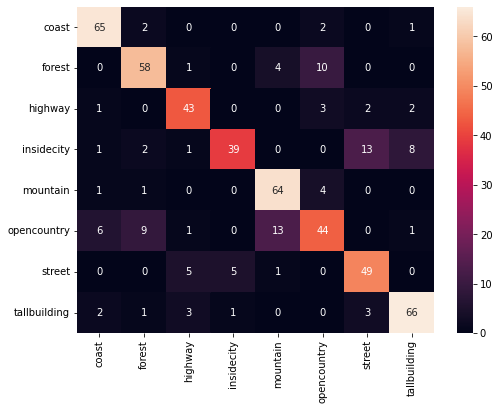

In [192]:
# Evaluation score
import sklearn
from sklearn.preprocessing import LabelEncoder
topics=['coast','forest','highway','insidecity','mountain','opencountry','street','tallbuilding']
le=LabelEncoder()
le.fit(topics)
predictions=le.transform(predictions)
temp=le.transform(y_test['Topic'])
log_score = sklearn.metrics.log_loss(ann_X_test.values,ann_X_pred.values)
print('Log-loss score :', log_score)

acc_score = sklearn.metrics.accuracy_score(temp, predictions)
print('Accuracy score :', acc_score)

print('Confusion matrix :')
conf_matrix=sklearn.metrics.confusion_matrix(temp, predictions)
print(conf_matrix)
df_cm = pd.DataFrame(data=conf_matrix, index = le.inverse_transform([x for x in range(8)]),columns = le.inverse_transform([x for x in range(8)]))
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)

### Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss,accuracy_score
classifier=RandomForestClassifier(n_estimators=150)
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])

predictions=classifier.predict(ann_X_pred)

grid = {'n_estimators' :[x for x in range(55,70)],
        'criterion':['gini', 'entropy'],
        'max_depth':[x for x in range(0,100,15)]
        }
grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
search = GridSearchCV(estimator=classifier, param_grid=grid, cv=5)
search.fit(X_train.iloc[:,2:], y_train['Topic'])
print(search.best_params_)

grid_scores = cross_val_score(search.best_estimator_,X_train.iloc[:,2:], y_train['Topic'], cv=5)
print(grid_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_scores.mean(), grid_scores.std() * 2))

KeyboardInterrupt: ignored

Log-loss score : 9.013398366457468
Accuracy score : 0.7490706319702602
Confusion matrix :
[[65  2  1  0  0  2  0  0]
 [ 1 51  1  0  2 18  0  0]
 [ 1  0 45  0  0  3  0  2]
 [ 0  2  5 33  0  0 11 13]
 [ 1  1  0  0 63  5  0  0]
 [ 5 18  1  0 12 37  0  1]
 [ 0  0  9  5  0  1 45  0]
 [ 1  0  6  0  0  0  5 64]]


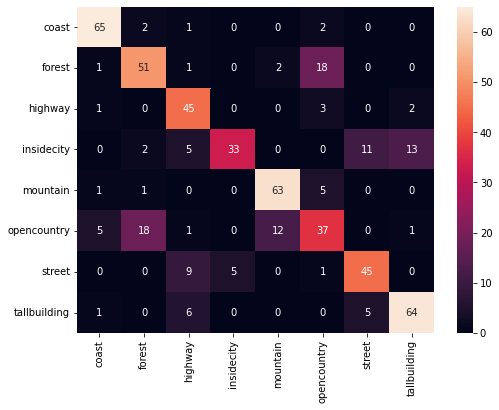

In [234]:
classifier=RandomForestClassifier(criterion='gini', max_depth= 90, n_estimators=66)
classifier.fit( X_train.iloc[:,2:], y_train['Topic'])
predictions=classifier.predict(ann_X_pred)


# Evaluation score
import sklearn
from sklearn.preprocessing import LabelEncoder
topics=['coast','forest','highway','insidecity','mountain','opencountry','street','tallbuilding']
le=LabelEncoder()
le.fit(topics)
predictions=le.transform(predictions)
temp=le.transform(y_test['Topic'])
log_score = sklearn.metrics.log_loss(ann_X_test.values,ann_X_pred.values)
print('Log-loss score :', log_score)

acc_score = sklearn.metrics.accuracy_score(temp, predictions)
print('Accuracy score :', acc_score)

print('Confusion matrix :')
conf_matrix=sklearn.metrics.confusion_matrix(temp, predictions)
print(conf_matrix)
df_cm = pd.DataFrame(data=conf_matrix, index = le.inverse_transform([x for x in range(8)]),columns = le.inverse_transform([x for x in range(8)]))
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)

## EVALUATING RESULTS

In [101]:
# Evaluation score
import sklearn
from sklearn.preprocessing import LabelEncoder
topics=['coast','forest','highway','insidecity','mountain','opencountry','street','tallbuilding']
le=LabelEncoder()
le.fit(topics)
predictions=le.transform(predictions)
temp=le.transform(y_test['Topic'])
log_score = sklearn.metrics.log_loss(ann_X_test.values,ann_X_pred.values)
print('Log-loss score :', log_score)

acc_score = sklearn.metrics.accuracy_score(temp, predictions)
print('Accuracy score :', acc_score)

print('Confusion matrix :')
conf_matrix=sklearn.metrics.confusion_matrix(temp, predictions)
print(conf_matrix)

Log-loss score : 9.013398366457468
Accuracy score : 0.8011152416356877
Confusion matrix :


numpy.ndarray

In [102]:
le.inverse_transform([x for x in range(8)])

array(['coast', 'forest', 'highway', 'insidecity', 'mountain',
       'opencountry', 'street', 'tallbuilding'], dtype='<U12')

### Plot Confusion Matrix

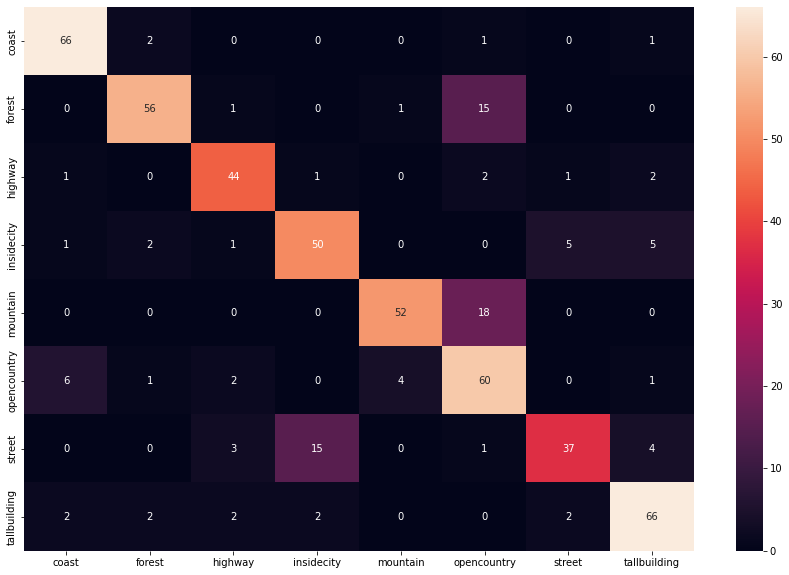

In [96]:
df_cm = pd.DataFrame(data=conf_matrix, index = le.inverse_transform([x for x in range(8)]),columns = le.inverse_transform([x for x in range(8)]))
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True)
# plt.savefig('Plots/confusion_matrix_1.jpg')

### Display False Positives and False Negatives

In [ ]:
count=0
for i in range(len(X_test['Image'].values)):
    if y_test.values[i]!=pred_caption_topics_name[i]:
        display(Image(filename='Datasets/Scene Classification/Images/'+X_test['Image'].values[i]))
        print('Actual Topic    :',y_test.values[i])
        print('Predicted Topic :',pred_caption_topics_name[i])
        print('---------------------------------------------------------------------')
    count=count+1

## CONCLUSION

The Log-loss score : 0.5342261715376968 <br>
The Accuracy score : 0.8252788104089219 <br>
Accuracy Of Classification: 80.11% <br>
Confusion Matrix was: <br>
![Confusion Matrix](confusion_matrix_1.jpg)